In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

sns.set_palette('Set2')

In [4]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#  Getting the number of rows and columns in our dataset
df.shape

(244, 7)

In [6]:
# Getting the basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
# Getting basic statistical measures on our numerical variables
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Our dataset looks clean! with no nulls nor improper datatypes. So lets move on and do EDA



# **EDA**

Heat map

<ipython-input-9-356b35caf875>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

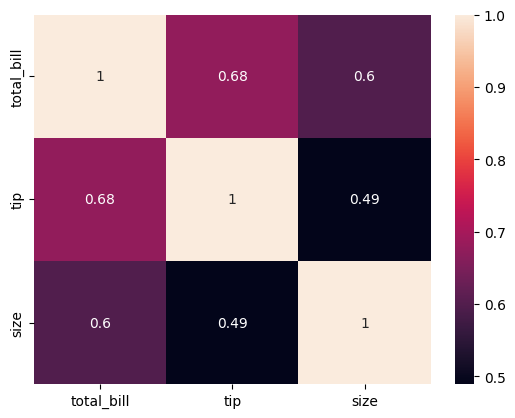

In [9]:
# Getting the correlation of numerical variables
sns.heatmap(df.corr(), annot=True)

Seems that our numerical variables has a positive moderate correlation to our tip variable



**Tip**

<Axes: xlabel='tip', ylabel='Count'>

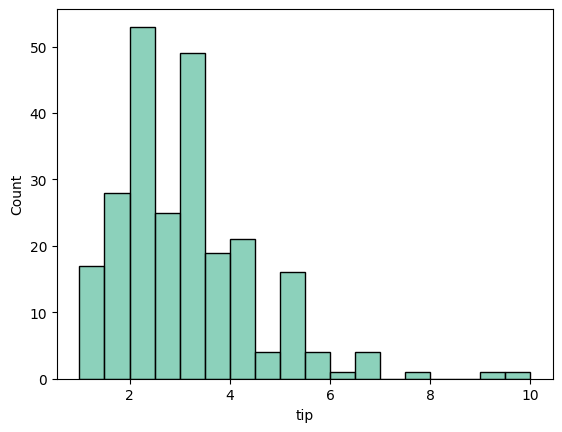

In [10]:
sns.histplot(x='tip', data=df)

Looking at the graph above, the distribution is a right skewed distribution



**Sex**

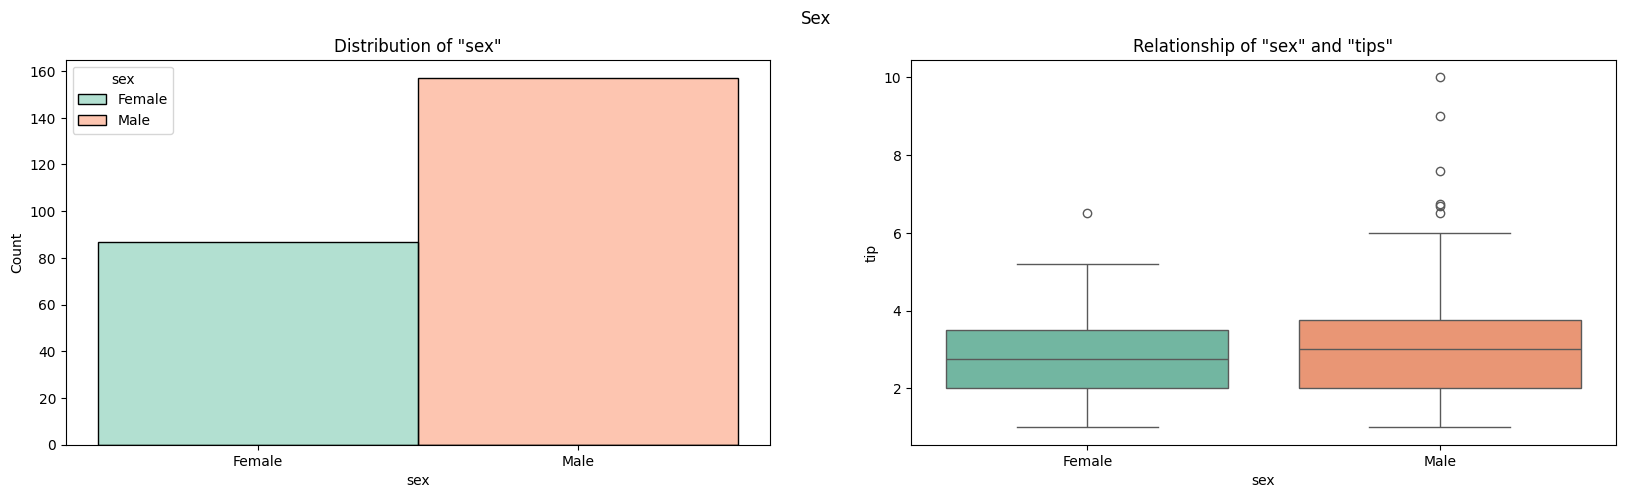

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Sex')

sns.histplot(x='sex', data=df, hue='sex', ax=ax[0])
sns.boxplot(x='sex', y='tip', hue='sex', data=df, ax=ax[1])

ax[0].set_title('Distribution of "sex"')
ax[1].set_title('Relationship of "sex" and "tips"')

plt.show()

Here we can see that there are more guys that payed the bill in our dataset than girls

Gender of the person paying the bill have little to no correlation to their corresponding tip

**Smoker**

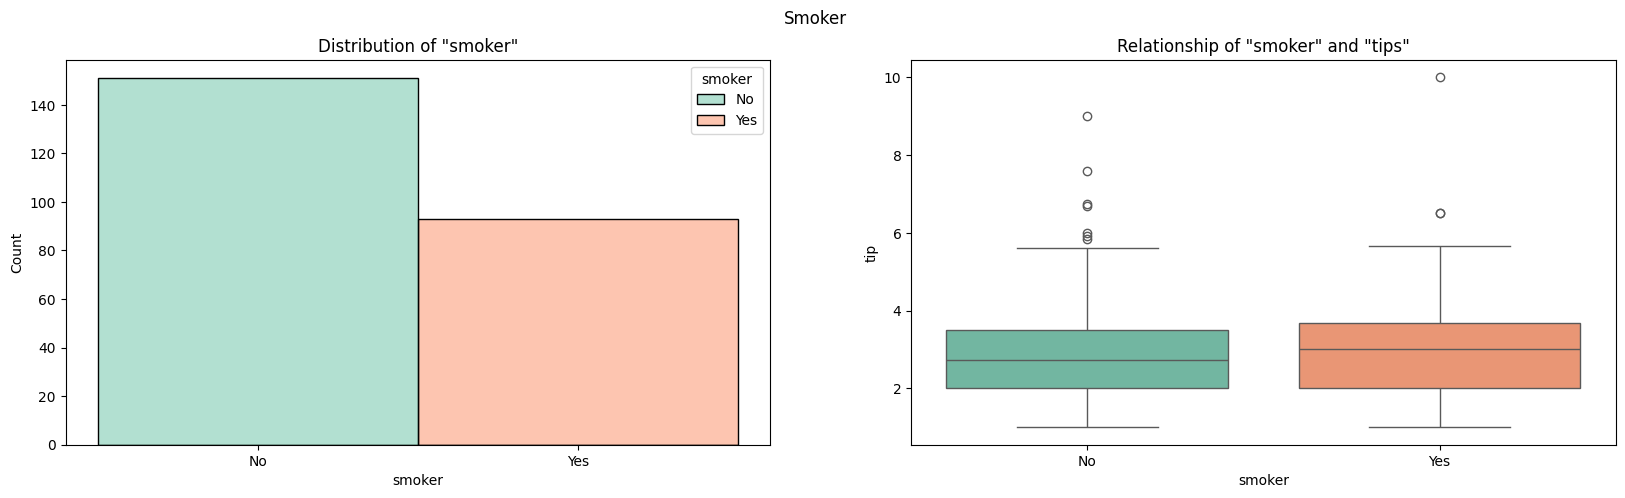

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Smoker')

sns.histplot(x='smoker', data=df, hue='smoker', ax=ax[0])
sns.boxplot(x='smoker', y='tip', hue='smoker', data=df, ax=ax[1])

ax[0].set_title('Distribution of "smoker"')
ax[1].set_title('Relationship of "smoker" and "tips"')

plt.show()

Based on the distribution, more people who payed the bill are non smoker.

Like sex, whether the person paying the bill is a smoker or not doesnt matter on how much they will tip

**Time**

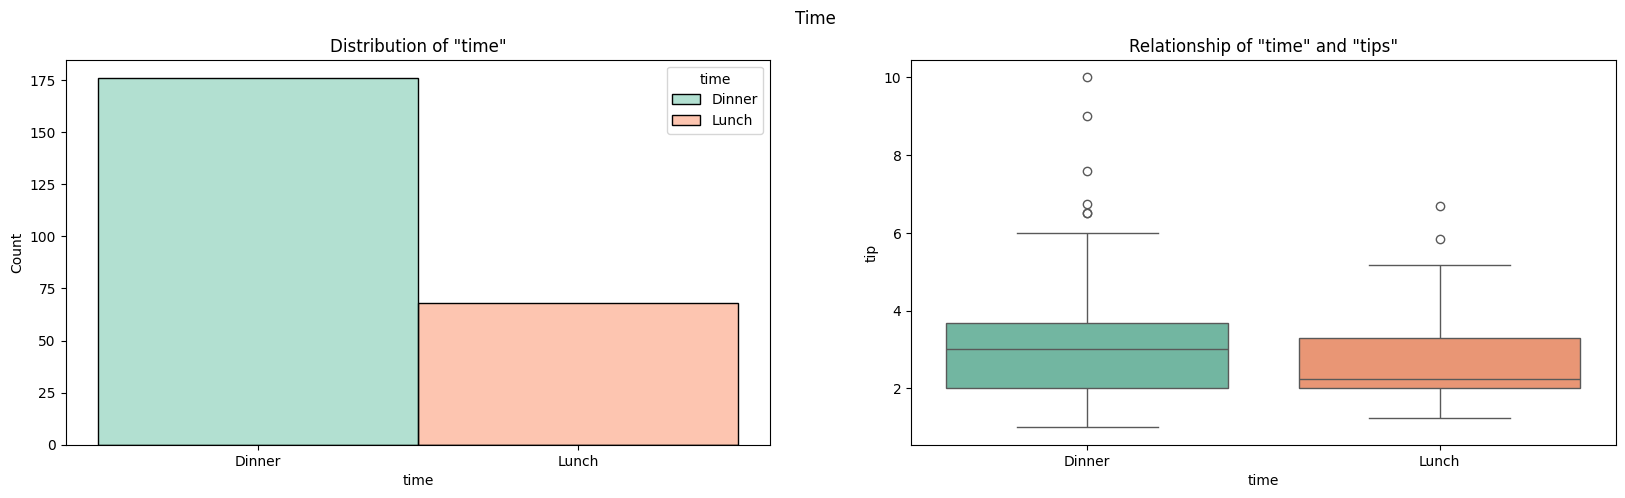

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Time')

sns.histplot(x='time', data=df, hue='time', ax=ax[0])
sns.boxplot(x='time', y='tip', hue='time', data=df, ax=ax[1])

ax[0].set_title('Distribution of "time"')
ax[1].set_title('Relationship of "time" and "tips"')

plt.show()

Theres more people going to the restaurant for dinner than lunch

In dinner, the tips are slightly higher than on lunch

**Day**

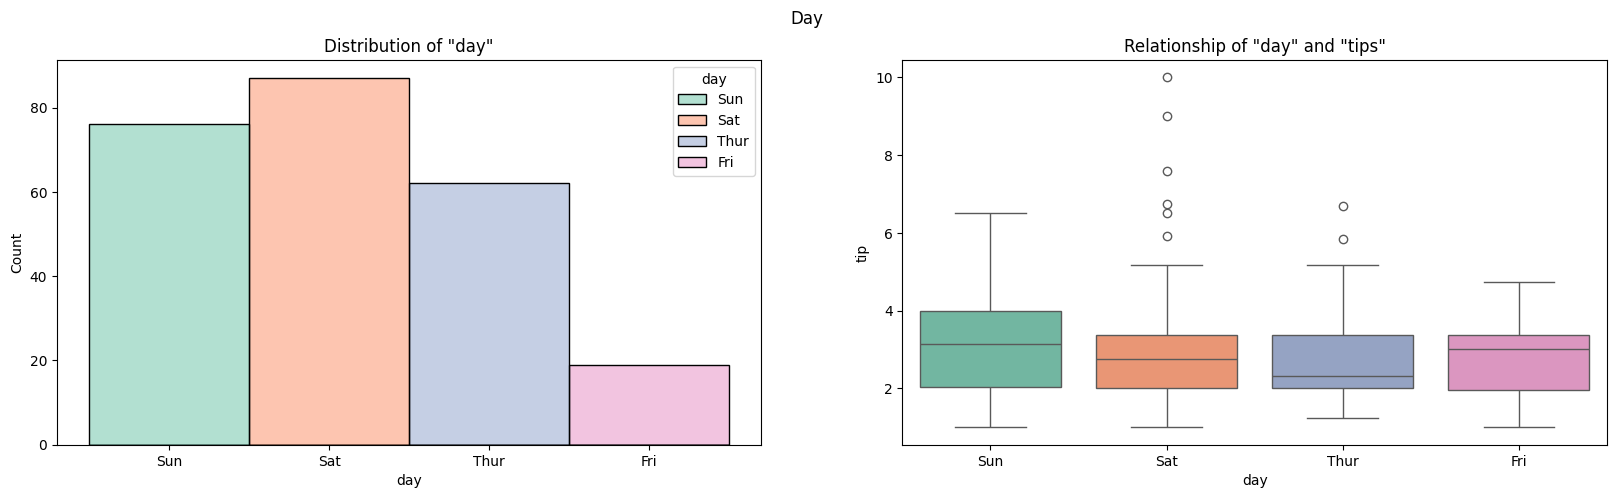

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Day')

sns.histplot(x='day', data=df, hue='day', ax=ax[0])
sns.boxplot(x='day', y='tip', hue='day', data=df, ax=ax[1])

ax[0].set_title('Distribution of "day"')
ax[1].set_title('Relationship of "day" and "tips"')

plt.show()

Based on the distribution above, There are more group of people who goes to the restaurant on Saturday followed by Sunday, Thursday and finally Friday.

The day of the week has a very little to no relationship to tip but at Sunday, It looks like the tips are slightly higher than other days

**Size**

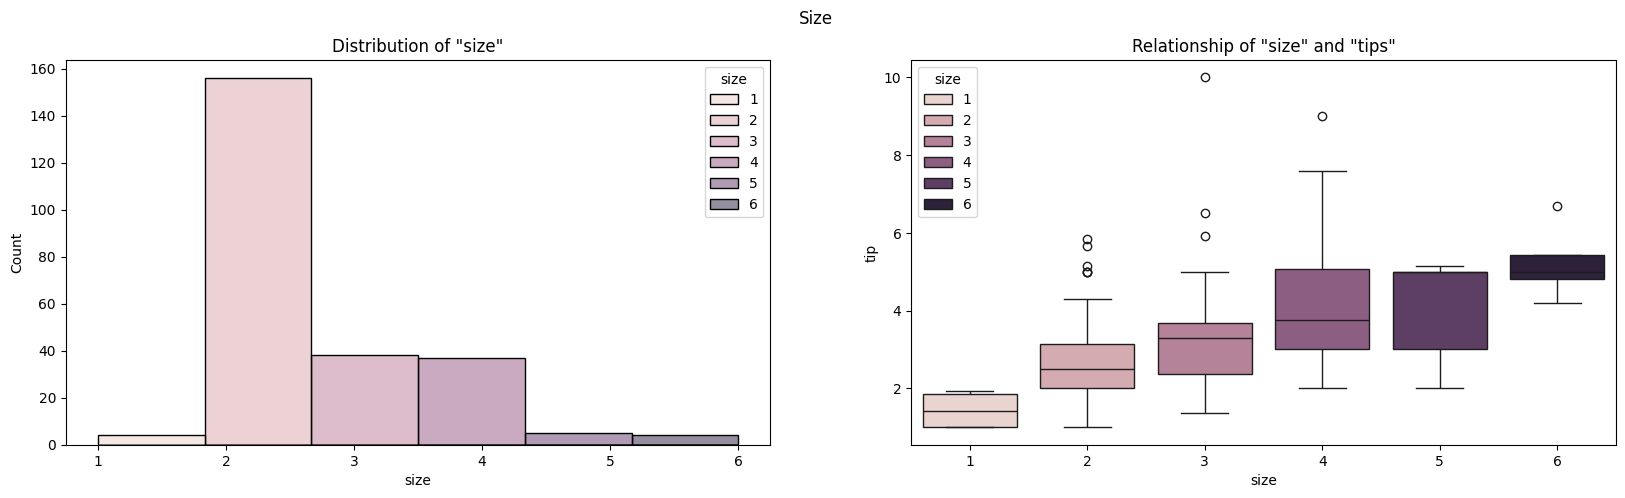

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Size')

sns.histplot(x='size', data=df, hue='size', ax=ax[0], binwidth=.9)
sns.boxplot(x='size', y='tip', hue='size', data=df, ax=ax[1])

ax[0].set_title('Distribution of "size"')
ax[1].set_title('Relationship of "size" and "tips"')

plt.show()

Based on the distribution above, Group of people who goes to the restaurant are usually group of 2 followed by 4, 3, 5 and 1 and 6 had a both count of 4.

And as expected. More people, more tips!

**Total** **Bill**

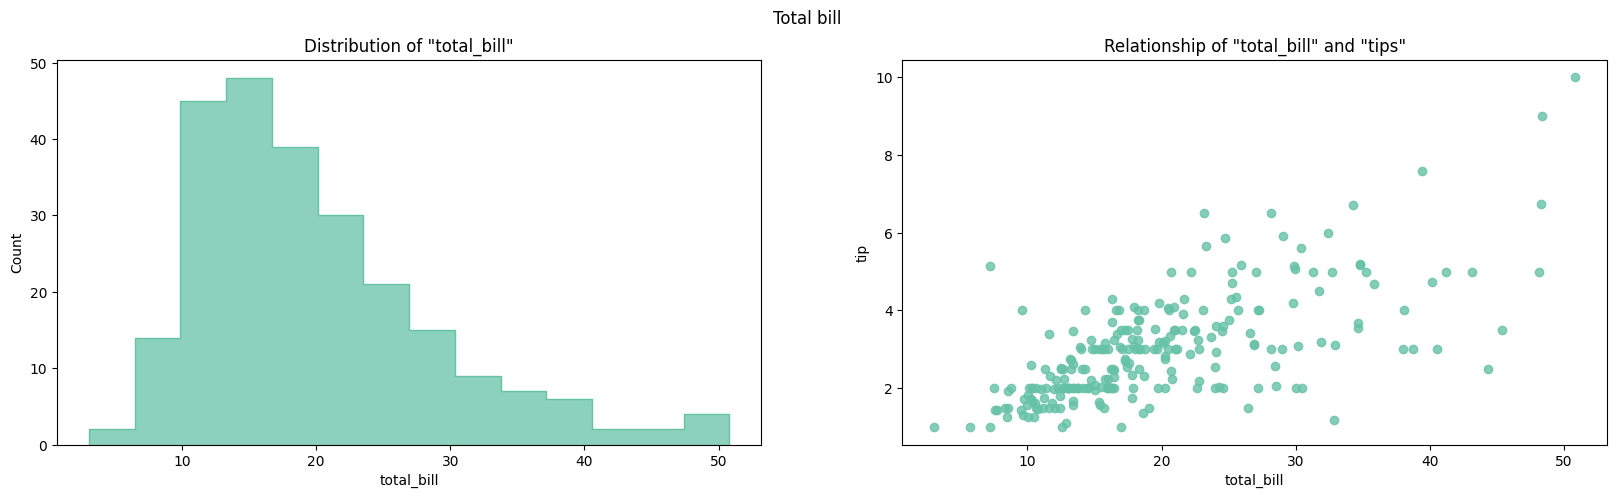

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

fig.suptitle('Total bill')

sns.histplot(x='total_bill', data=df, element='step', ax=ax[0])
sns.regplot(x='total_bill', y='tip', data=df, fit_reg=False, ax=ax[1])

ax[0].set_title('Distribution of "total_bill"')
ax[1].set_title('Relationship of "total_bill" and "tips"')

plt.show()

There we can see the total_bill distribution and it seems that it is a right skewed distribution.

Here we can see the relationship of tip and total_bill variable and we can clearly see that they are positively correlated to each other

# Preparing the Data

**Standarization of numerical variables**

In [17]:
scaler = preprocessing.MinMaxScaler()
df[["tip"]] = scaler.fit_transform(df[["tip"]])
df[["total_bill"]] = scaler.fit_transform(df[["total_bill"]])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4


**Using LabelEncoder for the categorical data**

In [18]:
X = df.drop(columns=['tip'])
y = df['tip']

print('Categorical columns: ')
for col in X.columns:
    if X[col].dtype == 'object':
        print(str(col)+' '+str(X[col].unique()))
        label = LabelEncoder()
        label = label.fit(X[col])
        X[col] = label.transform(X[col].astype(str))

Categorical columns: 
sex ['Female' 'Male']
smoker ['No' 'Yes']
day ['Sun' 'Sat' 'Thur' 'Fri']
time ['Dinner' 'Lunch']


In [19]:
X.head()

,total_bill,sex,smoker,day,time,size
0,0.291579,0,0,2,0,2
1,0.152283,1,0,2,0,3
2,0.375786,1,0,2,0,3
3,0.431713,1,0,2,0,2
4,0.450775,0,0,2,0,4


**Splitting the data into training and testing**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training and Evaluating the model

**Importing regression models**

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Making a function to evaluate models**

In [22]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

**Using the function to evaulate models**

In [23]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR',
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), x_train, y_train, x_test, y_test, model_names[index])
    index+=1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Looking at the r2's ddifferent models outputted**

In [24]:
models

{'Linear Regression': 0.34442676922637117,
 'Lasso': -0.002027013689140489,
 'Ridge': 0.348695064528449,
 'Bayesian Ridge': 0.34985756664041323,
 'Decision Tree Regressor': -0.30659370172121725,
 'Linear SVR': 0.3286009004710829,
 'KNeighbors Regressor': 0.041067138917917245,
 'Random Forest Regressor': 0.374504940822345}

We can see the the Linear SVR has the most r2 score (0.5727966372381182). Therefore, lets use Random Forest Regressor and visualize its predictions

In [25]:
model = LinearSVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


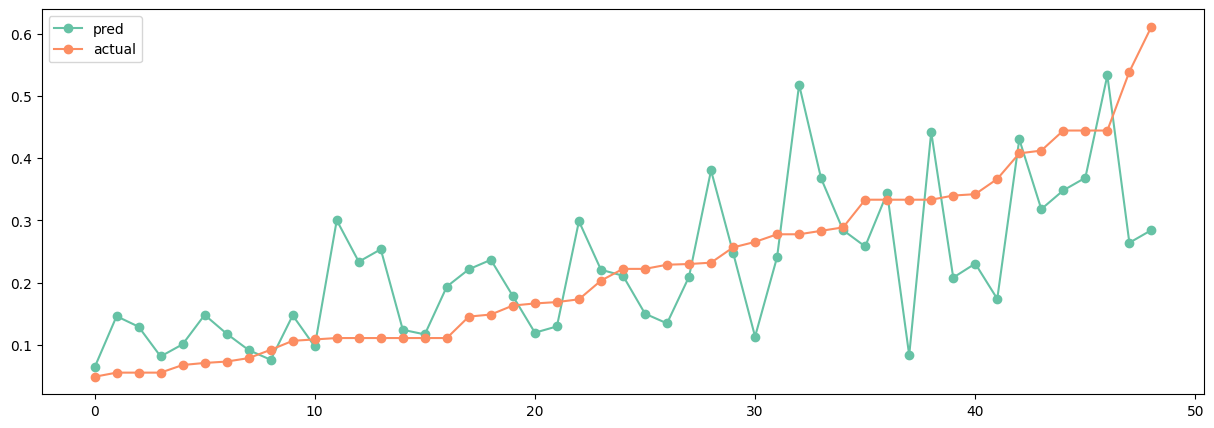

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', marker='o')
plt.plot(preds['y_test'], label='actual', marker='o')
plt.legend()
plt.show()

The predictions looks kinda off regarding to its actual value but I think it is good enough as the predictions only off for a few cents. Overall it was a fun project for me to do and I'll probably come back and make a better model hehe.

# Conclusion

So looking at graphs and analyzing them, I have concluded that columns "total_bill", "size" and "day" are the columns that affects tip most.